In [37]:
import pyart
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
print(pyart.__version__)

1.6.0


In [76]:
filename = './Downloads/KLOT20130417_235520_V06.gz'
radar = pyart.io.read('./Downloads/KLOT20130417_235520_V06.gz')

In [39]:
dir(radar)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_sweep_in_range',
 '_dic_info',
 'add_field',
 'add_field_like',
 'altitude',
 'altitude_agl',
 'antenna_transition',
 'azimuth',
 'check_field_exists',
 'drift',
 'elevation',
 'extract_sweeps',
 'fields',
 'fixed_angle',
 'gate_altitude',
 'gate_latitude',
 'gate_longitude',
 'gate_x',
 'gate_y',
 'gate_z',
 'georefs_applied',
 'get_azimuth',
 'get_elevation',
 'get_end',
 'get_field',
 'get_gate_x_y_z',
 'get_nyquist_vel',
 'get_slice',
 'get_start',
 'get_start_end',
 'heading',
 'info',
 'init_gate_altitude',
 'init_gate_longitude_latitude',
 'init_gate_x_y_z',
 'init_rays_per_sweep',
 'instrument_parameters',
 'iter_azimuth',
 'it

In [70]:
pyart.io.write_cfradial('converted_sigmet_file.nc', radar)

In [40]:
radar.azimuth.keys()

dict_keys(['data', 'standard_name', 'units', 'axis', 'comment', 'long_name'])

In [41]:
radar.azimuth['standard_name']

'beam_azimuth_angle'

In [42]:
radar.azimuth['data']

array([ 174.24316406,  174.72106934,  175.25390625, ...,  213.51379395,
        214.49981689,  215.49407959])

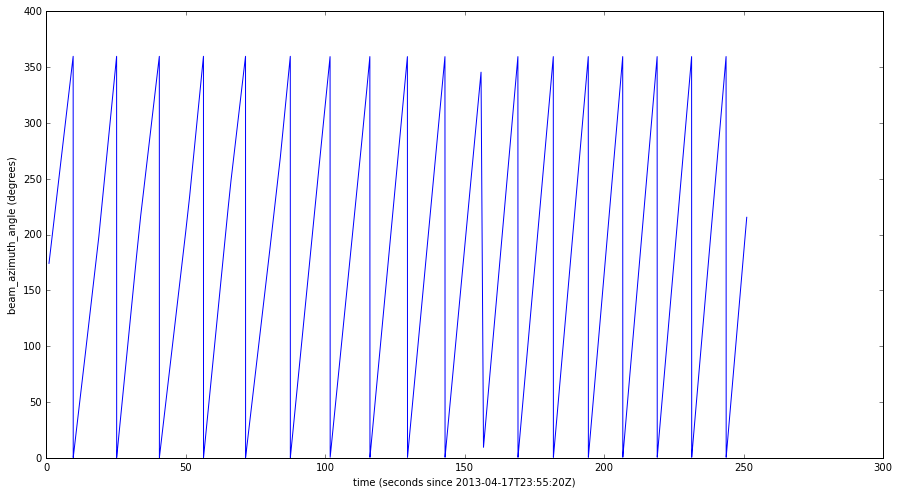

In [43]:
f = plt.figure(figsize=[15,8])
plt.plot(radar.time['data'], radar.azimuth['data'] )
plt.xlabel(radar.time['standard_name'] + ' (' + radar.time['units'] + ')')
plt.ylabel(radar.azimuth['standard_name'] + ' (' + radar.azimuth['units'] + ')')

2125.0 459875.0 meters


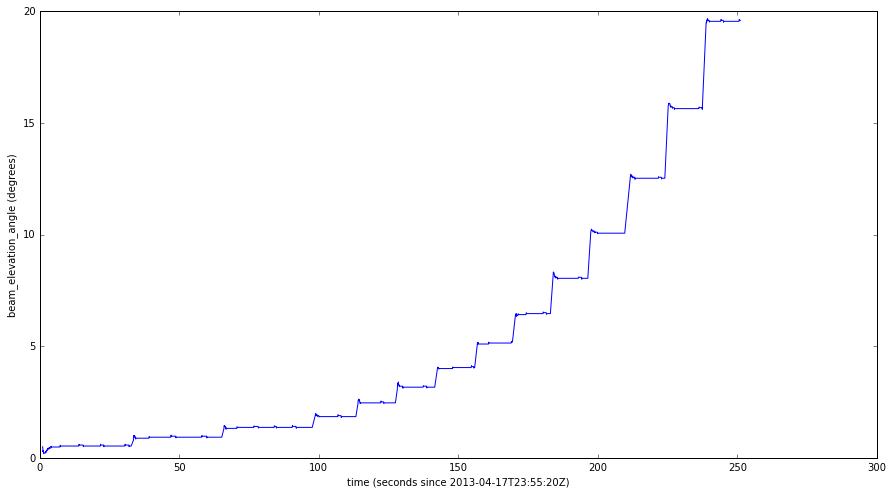

In [45]:
print(radar.range['data'].min(), radar.range['data'].max(), radar.range['units'])
f = plt.figure(figsize=[15,8])
plt.plot(radar.time['data'], radar.elevation['data'] )
plt.xlabel(radar.time['standard_name'] + ' (' + radar.time['units'] + ')')
plt.ylabel(radar.elevation['standard_name'] + ' (' + radar.elevation['units'] + ')')

In [47]:
for mykey in radar.metadata.keys():
    print(mykey, ': ', radar.metadata[mykey])

version :  1.3
original_container :  NEXRAD Level II
institution :  
comment :  
Conventions :  CF/Radial instrument_parameters
references :  
instrument_name :  
history :  
title :  
source :  


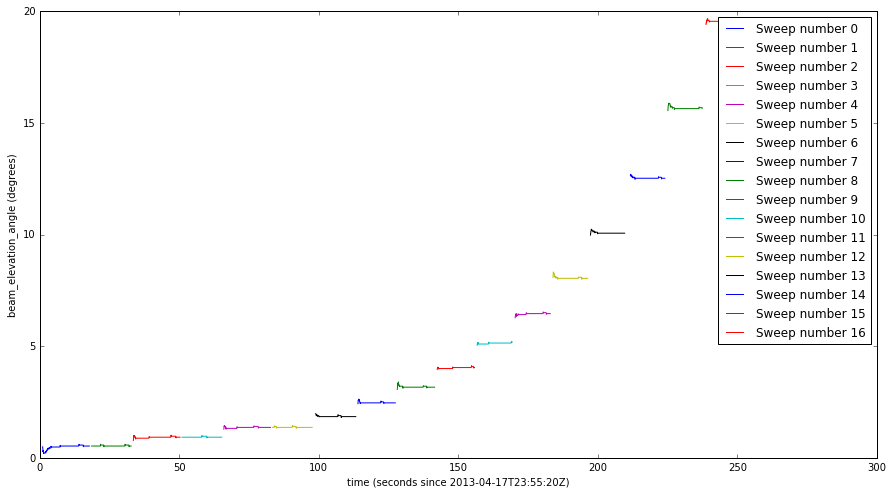

In [48]:
radar.sweep_end_ray_index['data']
f = plt.figure(figsize=[15,8])
for i in range(len(radar.sweep_end_ray_index['data'])):
    start_index = radar.sweep_start_ray_index['data'][i]
    end_index = radar.sweep_end_ray_index['data'][i]
    plt.plot(radar.time['data'][start_index:end_index], 
             radar.elevation['data'][start_index:end_index], 
             label = 'Sweep number '+ str(radar.sweep_number['data'][i]))
plt.legend()
plt.xlabel(radar.time['standard_name'] + ' (' + radar.time['units'] + ')')
plt.ylabel(radar.elevation['standard_name'] + ' (' + radar.elevation['units'] + ')')

In [50]:
print(radar.fields.keys())
print("")
for mykey in radar.fields.keys():
    print(mykey,':', radar.fields[mykey]['standard_name'] + ' (' + radar.fields[mykey]['units'] + ')')

dict_keys(['differential_phase', 'differential_reflectivity', 'velocity', 'reflectivity', 'cross_correlation_ratio', 'spectrum_width'])

differential_phase : differential_phase_hv (degrees)
differential_reflectivity : log_differential_reflectivity_hv (dB)
velocity : radial_velocity_of_scatterers_away_from_instrument (meters_per_second)
reflectivity : equivalent_reflectivity_factor (dBZ)
cross_correlation_ratio : cross_correlation_ratio_hv (ratio)
spectrum_width : doppler_spectrum_width (meters_per_second)


In [73]:
print(radar.fields.keys())

dict_keys(['differential_phase', 'differential_reflectivity', 'velocity', 'reflectivity', 'cross_correlation_ratio', 'spectrum_width'])


In [77]:
radar = radar.extract_sweeps([0,1])

In [79]:
display = pyart.graph.RadarMapDisplay(radar)
f = plt.figure(figsize = [17,4])
plt.subplot(1, 3, 1) 


MissingOptionalDependency: Basemap is required to use RadarMapDisplay but is not installed

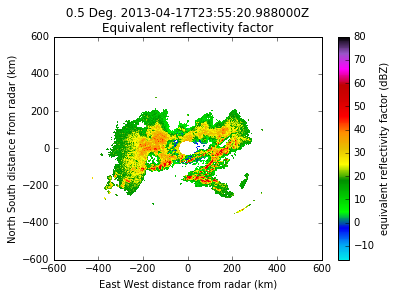

In [80]:
display = pyart.graph.RadarDisplay(radar)
display.plot('reflectivity', vmin=-16, vmax=80, cmap='pyart_NWSRef')

In [64]:
radar.info('compact')   # see what happens with 'standard' or 'full'

altitude: <ndarray of type: float64 and shape: (1,)>
altitude_agl: None
antenna_transition: None
azimuth: <ndarray of type: float64 and shape: (8280,)>
elevation: <ndarray of type: float32 and shape: (8280,)>
fields:
	differential_phase: <ndarray of type: float32 and shape: (8280, 1832)>
	differential_reflectivity: <ndarray of type: float32 and shape: (8280, 1832)>
	velocity: <ndarray of type: float32 and shape: (8280, 1832)>
	reflectivity: <ndarray of type: float32 and shape: (8280, 1832)>
	cross_correlation_ratio: <ndarray of type: float32 and shape: (8280, 1832)>
	spectrum_width: <ndarray of type: float32 and shape: (8280, 1832)>
fixed_angle: <ndarray of type: float32 and shape: (17,)>
instrument_parameters:
	unambiguous_range: <ndarray of type: float32 and shape: (8280,)>
	nyquist_velocity: <ndarray of type: float32 and shape: (8280,)>
latitude: <ndarray of type: float64 and shape: (1,)>
longitude: <ndarray of type: float64 and shape: (1,)>
nsweeps: 17
ngates: 1832
nrays: 8280
rada